## <center> Модуль 4. Однофакторный дисперсионный анализ. Практика  


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

### Задание 1

Сопоставить статистику и условия ее применения:  
|<center>Статистика</center>|<center>Условие</center>|
|----------|-------|
|1. z-тест |А) анализ различий между многими выборками|
|2. t-тест |B) проверка среднего выборки на конкретное значение при неизвестной дисперсии|
|3. F-тест |С) соответствие структуры данных гипотетической модели|
|4. $\chi^2$-тест|D) проверка дисперсии выборки на конкретное значение при известном среднем|
|5. ANOVA  |E) проверка среднего выборки на конкретное значение при известной дисперсии|
|          |F) сравнение дисперсий двух выборок|
|          |G) наличие или отсутствие связи между параметрами|

**Ответ:**  
1 - E  
2 - B   
3 - F   
4 - C, D, G  
5 - A, G

### Задание 2  
Порошок для посудомоечной машины насыпается в коробки, в которых он продается, с помощью автоматического дозатора, который настроен на дозирование **3 кг** порошка в каждую коробку. Чтобы проверить, что дозатор работает в соответствии с приемлемым стандартом (т.е. не нуждается в настройке), инженер-технолог берет случайные образцы из **50** коробок и взвешивает их. Установлено, что средний вес образца составляет **3,005 кг**. Известно, что дозатор работает с отклонением **0,015 кг** и что производитель порошка готов полагаться на **5%** уровень значимости. Предоставляет ли образец инженеру достаточные доказательства того, что истинное среднее значение не равно **3,00 кг**, и поэтому машина требует настройки?  
  
**Критерии оценивания:**  
- верно указана применяемая статистика и обоснование ее применения;
- получено расчетное значение статистики;
- получено критическое значение статистики;
- получено значение p_value;
- сделан статистический вывод на основе сравнения критического значения с расчетным;
- сделан статистический вывод на основе сравнения p-value и уровня значимости;
- сделан содержательный вывод по поставленной проблеме.

**Решение:**  

В настоящей задаче размер выборки превышает 30, известно стандартное отклонение - следует использовать **z-тест**.  
Определить нулевую и альтернативную гипотезы:
- $H_0:$ $\mu_x = 3$
- $H_1:$ $\mu_x \neq 3$   

Указать уровень значимости:  
- $\alpha = 0.05$

In [ ]:
sample_mean = 3.005     # возможное среднее значение
population_mean = 3     # среднее значение
population_std = 0.015  # стандартное отклонение
sample_size = 50        # размер выборки
alpha = 0.05            # уровень значимости

# Вычислить z-оценку
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
print('z-оценка:', z_score)

# Принять решение на основе критической z-оценки
# Рассчитать критическое значение z
z_critical = stats.norm.ppf(1 - alpha / 2)
print('Критическая z-оценка:', z_critical)

# Задать условие для принятия решения на основе критической z-оценки
if z_score > z_critical:
    print("Отклонить нулевую гипотезу (z_score > z_critical)")
else:
    print("Нельзя отклонить нулевую гипотезу (z_score < z_critical)")

# Вычислить p_value
p_value = 1 - stats.norm.cdf(z_score)
print('p-value:', p_value)

# Задать условие для принятия решения на основе p-value
if p_value < alpha:
    print("Отклонить нулевую гипотезу (p_value < alpha)")
else:
    print("Нельзя отклонить нулевую гипотезу (p_value > alpha)")

z-оценка: 2.3570226039551083
Критическая z-оценка: 1.959963984540054
Отклонить нулевую гипотезу (z_score > z_critical)
p-value: 0.009211062727050745
Отклонить нулевую гипотезу (p_value < alpha)


1. **Статистический вывод:** на основании имеющихся данных, при уровне значимости **5%** (*уровне доверия 95%*) **есть основания** отвергнуть нулевую гипотезу в пользу альтернативы.
2. **Содержательный вывод:** образец предоставляет инженеру достаточные доказательства того, что истинное среднее значение не равно **3,00 кг**, машина требует настройки.

### Задание 3  
Производитель двигателей хочет заменить стальные компоненты подвески алюминиевыми, чтобы снизить вес и тем самым улучшить производительность и расход топлива. Испытания на прочность проводятся на случайно выбранных образцах из двух возможных веществ, прежде чем будет сделан окончательный выбор. Результаты таковы:
| № вещества | Размер выборки | Средняя прочность (кг * мм$^-2$) | Стандартное отклонение (кг * мм$^-2$) |
|:----------:|:--------------:|:--------------------------------:|:-------------------------------------:|
| 1 | 15 | 90 | 2.3 |
| 2 | 10 | 88 | 2.2 |  

Есть ли разница между средними прочностными характеристиками веществ на уровне значимости **5%**?  
  
**Критерии оценивания:**
- верно указана применяемая статистика и обоснование ее применения;
- получено расчетное значение статистики;
- получено критическое значение статистики;
- получено значение p_value;
- сделан статистический вывод на основе сравнения критического значения с расчетным;
- сделан статистический вывод на основе сравнения p-value и уровня значимости;
- сделан содержательный вывод по поставленной проблеме.

**Решение:**  

В задаче следует использовать **t-тест** с независимым t-критерием:
- размеры выборок меньше 30;
- дисперсия популяции неизвестна;
- выборки не связаны друг с другом.

Определить нулевую и альтернативную гипотезы:
- $H_0:$ $\mu_1 = \mu_2$
- $H_1:$ $\mu_1 \neq \mu_2$   

Указать уровень значимости:  
- $\alpha = 0.05$

In [ ]:
# Группа А (стальные компоненты)
n1 = 15
n1_mean = 90
n1_std = 2.3

# Группа В (алюминиевые компоненты)
n2 = 10
n2_mean = 88
n2_std = 2.2

alpha = 0.05  # уровень значимости

# Вычислить несмещенные стандартные отклонения
n1_std_corr = n1_std * np.sqrt(n1 / (n1 - 1))
n2_std_corr = n2_std * np.sqrt(n2 / (n2 - 1))

# Вычислить статистики t_score и p_value
t_score, p_value = stats.ttest_ind_from_stats(n1_mean, n1_std_corr, n1, n2_mean, n1_std_corr, n2)

# Получить количество степеней свободы 
v = n1 + n2 - 2

# Рассчитать критическую t-оценку
t_critical = stats.t.ppf(1 - alpha / 2, df = v)
print('t-оценка:', t_score)
print('Критическая t-оценка:', t_critical)
print('p-value:', p_value)

# Задать условие для принятия решения на основе критической t-оценки
if np.abs(t_score) > t_critical:
    print("Отклонить нулевую гипотезу (t_score > t_critical)")
else:
    print("Нельзя отклонить нулевую гипотезу (t_score < t_critical)")

# Задать условие для принятия решения на основе p_value
if p_value < alpha:
    print("Отклонить нулевую гипотезу (p_value < alpha)")
else:
    print("Нельзя отклонить нулевую гипотезу (p_value > alpha)")

t-оценка: 2.0577668810781273
Критическая t-оценка: 2.0686576104190406
p-value: 0.051120239195899995
Нельзя отклонить нулевую гипотезу (t_score < t_critical)
Нельзя отклонить нулевую гипотезу (p_value > alpha)


1. **Статистический вывод:** на основании имеющихся данных, при уровне значимости **5%** (*уровне доверия 95%*) **нет оснований** отвергнуть нулевую гипотезу в пользу альтернативы.
2. **Содержательный вывод:** различия между прочностными характеристиками стальных и алюминиевых компонентов не выявлены.

### Задание 4
Производитель электронного оборудования разработал схему для подачи тока на определенный компонент экрана дисплея компьютера. Хотя новая конструкция дешевле в производстве, ее можно внедрить в массовое производство только в том случае, если она пропускает к компоненту тот же средний ток. В ходе испытаний с участием двух схем получены следующие результаты.  
| № теста | Ток старой к. (мА) | Ток новой к. (мА) |
|:----------:|:--------------:|:--------------------------------:|
| 1 | 80.1 | 80.7 |
| 2 | 82.3 | 81.3 |
| 3 | 84.1 | 84.6 |
| 4 | 82.6 | 81.7 |
| 5 | 85.3 | 86.3 |
| 6 | 81.3 | 84.3 |
| 7 | 83.2 | 83.7 |
| 8 | 81.7 | 84.7 |
| 9 | 82.2 | 82.8 |
| 10 | 81.4 | 84.4 |
| 11 |  | 85.2 |
| 12 | | 84.9 |  

Если предположить, что выборки, из которых взяты результаты, имеют равные дисперсии, следует ли производителю заменить старую конструкцию схемы на новую? Используйте уровень значимости **5%**.  

**Критерии оценивания:**
- верно указана применяемая статистика и обоснование ее применения;
- получено расчетное значение статистики;
- получено критическое значение статистики;
- получено значение p_value;
- сделан статистический вывод на основе сравнения критического значения с расчетным;
- сделан статистический вывод на основе сравнения p-value и уровня значимости;
- сделан содержательный вывод по поставленной проблеме.

**Решение:**  

В задаче следует использовать **t-тест** с независимым t-критерием:
- размеры выборок меньше 30;
- дисперсия популяции неизвестна;
- выборки не связаны друг с другом.

Определить нулевую и альтернативную гипотезы:
- $H_0:$ $\mu_1 = \mu_2$
- $H_1:$ $\mu_1 \neq \mu_2$   

Указать уровень значимости:  
- $\alpha = 0.05$

In [ ]:
x1 = np.array([80.1, 82.3, 84.1, 82.6, 85.3, 81.3, 83.2, 81.7, 82.2, 81.4])
x2 = np.array([80.7, 81.3, 84.6, 81.7, 86.3, 84.3, 83.7, 84.7, 82.8, 84.4, 85.2, 84.9])
alpha = 0.05  # уровень значимости

# Вычислить t-score и p-value
res = stats.ttest_ind(x1, x2) # для двух независимых выборок
t_score = res[0]
p_value = res[1]

# Вычислить критическую t-оценку
t_critical = stats.t.ppf(1 - alpha / 2, df = res.df)
print('t-оценка:', t_score)
print('Критическая t-оценка:', t_critical)
print('p-value:', p_value)

# Задать условие для принятия решения на основе критической t-оценки
if np.abs(t_score) > t_critical:
    print("Отклонить нулевую гипотезу (t_score > t_critical)")
else:
    print("Нельзя отклонить нулевую гипотезу (t_score < t_critical)")

# Задать условие для принятия решения на основе p_value
if p_value < alpha:
    print("Отклонить нулевую гипотезу (p_value < alpha)")
else:
    print("Нельзя отклонить нулевую гипотезу (p_value > alpha)")

t-оценка: -1.8657246011714124
Критическая t-оценка: 2.0859634472658364
p-value: 0.07681685091779608
Нельзя отклонить нулевую гипотезу (t_score < t_critical)
Нельзя отклонить нулевую гипотезу (p_value > alpha)


1. **Статистический вывод:** на основании имеющихся данных, при уровне значимости **5%** (*уровне доверия 95%*) **нет оснований** отвергнуть нулевую гипотезу в пользу альтернативы.
2. **Содержательный вывод:** различия между характеристиками обеих конструкций не выявлены, производитель может осуществить их замену на своем производстве.

### Задание 5
Для оценки эффективности нового гипогликемического средства были проведены измерения уровня глюкозы в крови пациентов, страдающих сахарным диабетом, до и после приема препарата. В результате были получены следующие данные:
| № пациента | Ур. глюкозы до препарата | Ур. шлюкозы после препарата |
|:----------:|:--------------:|:--------------------------------:|
| 1 | 9.6 | 7.7 |
| 2 | 8.1 | 6.2 |
| 3 | 8.8 | 7.4 |
| 4 | 7.9 | 7.5 |
| 5 | 9.2 | 8.3 |
| 6 | 8.0 | 6.2 |
| 7 | 8.4 | 8.1 |
| 8 | 10.1 | 8.9 |
| 9 | 7.8 | 7.4 |
| 10 | 8.1 | 7.0 |

Определить, есть ли эффект от приема препарата на уровне доверия **0.95**.

**Критерии оценивания:**
- верно указана применяемая статистика и обоснование ее применения;
- получено расчетное значение статистики;
- получено критическое значение статистики;
- получено значение p_value;
- сделан статистический вывод на основе сравнения критического значения с расчетным;
- сделан статистический вывод на основе сравнения p-value и уровня значимости;
- сделан содержательный вывод по поставленной проблеме.

**Решение:**  

В задаче следует использовать односторонний **t-тест** с парным t-критерием:
- размеры выборок меньше 30;
- дисперсия популяции неизвестна;
- выборки связаны друг с другом (в исследовании участвовали одни и те же пациенты).

Определить нулевую и альтернативную гипотезы:
- $H_0:$ $\mu_1 = \mu_2$
- $H_1:$ $\mu_1 > \mu_2$   

Указать уровень значимости:  
- $\alpha = 0.05$

In [5]:
x1 = np.array([9.6, 8.1, 8.8, 7.9, 9.2, 8.0, 8.4, 10.1, 7.8, 8.1])
x2 = np.array([7.7, 6.2, 7.4, 7.5, 8.3, 6.2, 8.1, 8.9, 7.4, 7.0])
alpha = 0.05  # уровень значимости

# Вычислить t-score и p-value
res = stats.ttest_rel(x1, x2, alternative='greater') # для двух связанных выборок
t_score = res[0]
p_value = res[1]

# Вычислить критическую t-оценку
t_critical = stats.t.ppf(1 - alpha, df = res.df)
print('t-оценка:', t_score)
print('Критическая t-оценка:', t_critical)
print('p-value:', p_value)

# Задать условие для принятия решения на основе критической t-оценки
if np.abs(t_score) > t_critical:
    print("Отклонить нулевую гипотезу (t_score > t_critical)")
else:
    print("Нельзя отклонить нулевую гипотезу (t_score < t_critical)")

# Задать условие для принятия решения на основе p_value
if p_value < alpha:
    print("Отклонить нулевую гипотезу (p_value < alpha)")
else:
    print("Нельзя отклонить нулевую гипотезу (p_value > alpha)")

t-оценка: 5.713032381721969
Критическая t-оценка: 1.8331129326536333
p-value: 0.0001447470198376748
Отклонить нулевую гипотезу (t_score > t_critical)
Отклонить нулевую гипотезу (p_value < alpha)


1. **Статистический вывод:** на основании имеющихся данных, при уровне значимости **5%** (*уровне доверия 95%*) **есть основания** отвергнуть нулевую гипотезу в пользу альтернативы.
2. **Содержательный вывод:** различия между уровнями глюкозы в крови пациентов выявлены, что позволяет свидетельствовать об эффективности нового гипогликемического средства.

### Задание 6
Производитель стальных тросов, используемых при строительстве подвесных мостов, экспериментировал с новым типом стали, который, как он надеется, сделает производимые тросы более прочными в том смысле, что они будут выдерживать большие нагрузки натяжения до разрушения. Для того чтобы проверить производительность новых тросов по сравнению со старыми тросами, образцы испытываются на разрушение при растяжении. Полученные результаты приведены ниже, где напряжения разрушения указаны в кг$\times 10^3$  
| № теста | Новый кабель | Старый кабель |
|:-------:|:------------:|:-------------:|
| 1 | 92.7 | 90.1 |
| 2 | 91.6 | 92.2 |
| 3 | 94.7 | 94.3 |
| 4 | 93.7 | 92.1 |
| 5 | 96.5 | 93.4 |
| 6 | 94.3 | 91.1 |
| 7 | 93.7 | 93.2 |
| 8 | 96.8 | 91.5 |
| 9 | 98.9 |  |
| 10 | 99.9 |  |  

Изготовитель кабеля, изучив законодательство по охране труда и технике безопасности, решает, что в любой статистической процедуре тестирования, принятой для различения кабелей, следует использовать уровень значимости **1%**. На основе полученных результатов и предполагая, что выборки, из которых взяты образцы, не имеют равных дисперсий, должен ли изготовитель заменить старый кабель новым?  

**Критерии оценивания:**
- верно указана применяемая статистика и обоснование ее применения;
- получено расчетное значение статистики;
- получено критическое значение статистики;
- получено значение p_value;
- сделан статистический вывод на основе сравнения критического значения с расчетным;
- сделан статистический вывод на основе сравнения p-value и уровня значимости;
- сделан содержательный вывод по поставленной проблеме.

**Решение:**  

В задаче следует использовать **t-тест** с независимым t-критерием:
- размеры выборок меньше 30;
- дисперсия популяции неизвестна;
- выборки не связаны друг с другом.

Определить нулевую и альтернативную гипотезы:
- $H_0:$ $\mu_1 = \mu_2$
- $H_1:$ $\mu_1 < \mu_2$   

Указать уровень значимости:  
- $\alpha = 0.01$

In [11]:
x1 = np.array([92.7, 91.6, 94.7, 93.7, 96.5, 94.3, 93.7, 96.8, 98.9, 99.9])
x2 = np.array([90.1, 92.2, 94.3, 92.1, 93.4, 91.1, 93.2, 91.5])
alpha = 0.01 # уровень значимости

# Вычислить t-score и p-value
res = stats.ttest_ind(x1, x2, equal_var=False, alternative='greater')
t_score = res[0]
p_value = res[1]

# Вычислить критическую t-оценку
t_critical = stats.t.ppf(1 - alpha, df = res.df)
print('t-оценка:', t_score)
print('Критическая t-оценка:', t_critical)
print('p-value:', p_value)

# Задать условие для принятия решения на основе критической t-оценки
if np.abs(t_score) > t_critical:
    print("Отклонить нулевую гипотезу (t_score > t_critical)")
else:
    print("Нельзя отклонить нулевую гипотезу (t_score < t_critical)")

# Задать условие для принятия решения на основе p_value
if p_value < alpha:
    print("Отклонить нулевую гипотезу (p_value < alpha)")
else:
    print("Нельзя отклонить нулевую гипотезу (p_value > alpha)")

t-оценка: 3.120397708249153
Критическая t-оценка: 2.6274728694881135
p-value: 0.0037950235841139484
Отклонить нулевую гипотезу (t_score > t_critical)
Отклонить нулевую гипотезу (p_value < alpha)


1. **Статистический вывод:** на основании имеющихся данных, при уровне значимости **1%** (*уровне доверия 99%*) **есть основания** отвергнуть нулевую гипотезу в пользу альтернативы.
2. **Содержательный вывод:** различия между напряжениями разрушения обоих тросов выявлены, изготовитель может заменить исходный кабель новым.

### Задание 7
10 абитуриентов пришли на подготовительные курсы по ЕГЭ и написали тестирование в начале обучения и после. Результаты теста приведены в таблице.  
|№    |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|До   |  7  |  6  |  5  |  4  |  6  |  2  |  10 |  3  |  8  |  5  |
|После|  9  |  6  |  4  |  5  |  7  |  4  |  10 |  6  |  9  |  6  |  

Влияют ли подготовительные курсы на подготовку абитуриентов на уровне значимости **0.01**?

**Критерии оценивания:**
- верно указана применяемая статистика и обоснование ее применения;
- получено расчетное значение статистики;
- получено критическое значение статистики;
- получено значение p_value;
- сделан статистический вывод на основе сравнения критического значения с расчетным;
- сделан статистический вывод на основе сравнения p-value и уровня значимости;
- сделан содержательный вывод по поставленной проблеме.

**Решение:**  

В задаче следует использовать односторонний **t-тест** с парным t-критерием:
- размеры выборок меньше 30;
- дисперсия популяции неизвестна;
- выборки связаны друг с другом (в исследовании участвовали одни и те же пациенты).

Определить нулевую и альтернативную гипотезы:
- $H_0:$ $\mu_1 = \mu_2$
- $H_1:$ $\mu_1 < \mu_2$   

Указать уровень значимости:  
- $\alpha = 0.01$

In [2]:
x1 = np.array([7, 6, 5, 4, 6, 2, 10, 3, 8, 5])
x2 = np.array([9, 6, 4, 5, 7, 4, 10, 6, 9, 6])
alpha = 0.01 # уровень значимости

# Вычислить t-score и p-value
res = stats.ttest_rel(x1, x2, alternative='less')
t_score = res[0]
p_value = res[1]

# Вычислить критическую t-оценку
t_critical = stats.t.ppf(1 - alpha, df = res.df)
print('t-оценка:', t_score)
print('Критическая t-оценка:', t_critical)
print('p-value:', p_value)

# Задать условие для принятия решения на основе критической t-оценки
if np.abs(t_score) > t_critical:
    print("Отклонить нулевую гипотезу (t_score > t_critical)")
else:
    print("Нельзя отклонить нулевую гипотезу (t_score < t_critical)")

# Задать условие для принятия решения на основе p_value
if p_value < alpha:
    print("Отклонить нулевую гипотезу (p_value < alpha)")
else:
    print("Нельзя отклонить нулевую гипотезу (p_value > alpha)")

t-оценка: -2.7386127875258306
Критическая t-оценка: 2.821437925025808
p-value: 0.011449747275884138
Нельзя отклонить нулевую гипотезу (t_score < t_critical)
Нельзя отклонить нулевую гипотезу (p_value > alpha)


1. **Статистический вывод:** на основании имеющихся данных, при уровне значимости **1%** (*уровне доверия 99%*) **нет оснований** отвергнуть нулевую гипотезу в пользу альтернативы.
2. **Содержательный вывод:** положительное влияние подготовительных курсов по ЕГЭ на итоговую успеваемость абитуриентов не выявлено.

### Задание 8
Были проведены исследования влияния фруктов на IQ людей. Первая группа среди всех фруктов питалась исключительно апельсинами, вторая – только грушами.  
|№        |   1   |   2   |   3   |   4   |   5   |   6   |   7   |   8   |   9   |   10  |
|:-------:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|Апельсины|  125  |  138  |  112  |  130  |  124  |  125  |  110  |  112  |  117  |  126  |
|Груши    |  124  |  102  |  142  |  130  |  131  |  124  |  127  |  115  |  108  |  109  |  

Проверить гипотезу, что дисперсии обеих групп одинаковые на уровне значимости **0.05**.  

**Критерии оценивания:**
- верно указана применяемая статистика и обоснование ее применения;
- получено расчетное значение статистики;
- получено критическое значение статистики;
- получено значение p_value;
- сделан статистический вывод на основе сравнения критического значения с расчетным;
- сделан статистический вывод на основе сравнения p-value и уровня значимости;
- сделан содержательный вывод по поставленной проблеме.

**Решение:**  

В задаче следует использовать  **F-тест** из-за необходимости сравнения дисперсий двух выборок.  

Определить нулевую и альтернативную гипотезы:
- $H_0:$ дисперсии выборок существенно не отличаются;
- $H_1:$ дисперсии выборок существенно отличаются.   

Указать уровень значимости:  
- $\alpha = 0.05$

In [4]:
x1 = np.array([125, 138, 112, 130, 124, 125, 110, 112, 117, 126])
x2 = np.array([124, 102, 142, 130, 131, 124, 127, 115, 108, 109])
alpha = 0.05  # уровень значимости
n = len(x1)   # размера выборки

# Вычислить дисперсии
S1 = x1.var() * n / (n - 1)
S2 = x2.var() * n / (n - 1)

# Вычислить F-оценку
if S1 > S2:
    F_score = S1/S2
else:
    F_score = S2/S1   
print('F-оценка:', np.abs(F_score))

# Вычислить критическую F-оценку
F_critical = stats.f.ppf(1 - alpha, dfn = n - 1, dfd = n - 1)
print('Критическая F-оценка:', F_critical)

# Вычислить p-value
p_value = stats.f.cdf(np.abs(F_score), dfn = n - 1, dfd = n - 1)
print('p-value:', p_value)

# Задать условие для принятия решения на основе критической t-оценки
if np.abs(F_score) > F_critical:
    print("Отклонить нулевую гипотезу (F_score > F_critical)")
else:
    print("Нельзя отклонить нулевую гипотезу (F_score < F_critical)")

# Задать условие для принятия решения на основе p_value
if p_value < alpha:
    print("Отклонить нулевую гипотезу (p_value < alpha)")
else:
    print("Нельзя отклонить нулевую гипотезу (p_value > alpha)")

F-score: 1.9061769156692805
Critical F-Score: 3.17889310445827
p-value: 0.824706379417758
Нельзя отклонить нулевую гипотезу (F_score < F_critical)
Нельзя отклонить нулевую гипотезу (p_value > alpha)


1. **Статистический вывод:** на основании имеющихся данных, при уровне значимости **5%** (*уровне доверия 95%*) **нет оснований** отвергнуть нулевую гипотезу в пользу альтернативы.
2. **Содержательный вывод:** существенное различие дисперсий обеих выборок не выявлено.

### Задание 9
Для 100 самолетов была составлена таблица, показывающая, сколько потребовалось вылетов каждому самолету, чтобы найти потерявшийся в море корабль.  
|Вылет |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |
|:----:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|Кол-во|  36 |  23 |  11 |  13 |  8  |  3  |  2  |  1  |  3  |  

Предложить распределение, которое могло бы соответствовать этим данным на уровне доверия **0.95**.

**Критерии оценивания:**
- верно указана применяемая статистика и обоснование ее применения;
- получено расчетное значение статистики;
- получено критическое значение статистики;
- получено значение p_value;
- сделан статистический вывод на основе сравнения критического значения с расчетным;
- сделан статистический вывод на основе сравнения p-value и уровня значимости;
- сделан содержательный вывод по поставленной проблеме.

**Решение:**  

На основании имеющихся данных можем предположить их геометрическое распределение (число вылетов каждого самолета до обнаружения корабля - первого успеха). Будем использовать $\chi^2$-тест на соответствие.

Определить нулевую и альтернативную гипотезы:
- $H_0:$ данные распределены геометрически;
- $H_1:$ данные не распределены геометрически.  

Указать уровень значимости:  
- $\alpha = 0.05$

Оценочная вероятность успеха р: 0.36496350364963503
chi2-оценка: 6.497470448054541
Критическая chi2-оценка: 14.067140449340167
p-value: 0.5916882366969761
Нельзя отклонить нулевую гипотезу (chi2_score < chi2_critical)
Нельзя отклонить нулевую гипотезу (p_value > alpha)


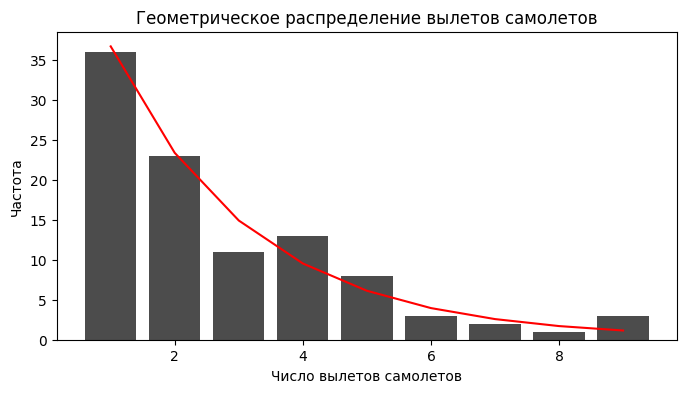

In [ ]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
Y = np.array([36, 23, 11, 13, 8, 3, 2, 1, 3])
nu = Y.shape[0] - 1 - 1
alpha = 0.05  # уровень значимости

n_sum = Y.sum() # сумма значений выборки Y
n = len(Y) # размер выборки Y

# Оценить вероятность успеха р
p = n_sum / (X @ Y)
print('Оценочная вероятность успеха р:', p)

# Получить расчетные значения выборки
Y_calc = np.zeros(n)
for i in range(0, n):
    Y_calc[i] = stats.geom.pmf(X[i], p) * n_sum

# Привести сумму расчетных значений в соответствие сумме в выборке Y
Y_calc = Y_calc + (n_sum - Y_calc.sum()) / n

# Вычислить chi2-score и p-value
res = stats.chisquare(Y, Y_calc)
chi2_score, p_value = res.statistic, res.pvalue

# Вычислить критическую chi2-оценку
chi2_critical = stats.chi2.ppf(1 - alpha, df = nu)
print('chi2-оценка:', chi2_score)
print('Критическая chi2-оценка:', chi2_critical)
print('p-value:', p_value)

# Задать условие для принятия решения на основе критической chi-оценки
if np.abs(chi2_score) > chi2_critical:
    print("Отклонить нулевую гипотезу (chi2_score > chi2_critical)")
else:
    print("Нельзя отклонить нулевую гипотезу (chi2_score < chi2_critical)")

# Задать условие для принятия решения на основе p_value
if p_value < alpha:
    print("Отклонить нулевую гипотезу (p_value < alpha)")
else:
    print("Нельзя отклонить нулевую гипотезу (p_value > alpha)")

# Визуализировать полученное распределение исходных и расчетных значений
plt.figure(figsize=(8, 4))
plt.title("Геометрическое распределение вылетов самолетов")
plt.bar(X, Y, color='black', alpha=0.7, width=0.8)
plt.plot(X, Y_calc, color='red')
plt.xlabel('Число вылетов самолетов')
plt.ylabel('Частота')
plt.show()

1. **Статистический вывод:** на основании имеющихся данных, при уровне значимости **5%** (*уровне доверия 95%*) **нет оснований** отвергнуть нулевую гипотезу в пользу альтернативы.
2. **Содержательный вывод:** на основании имеющихся данных и полученного графика можно предположить, что данные о вылетах самолетов распределены геометрически.

### Задание 10
В ходе исследования изучается взаимосвязь между цветом глаз (голубые, карие, зелёные) и цветом волос (светлые, тёмные, рыжие). Собираются следующие данные:  
|       |Светлые|Темные|Рыжие|Всего|
|:-----:|:-----:|:----:|:---:|:---:|
|Голубые|   35  |  52  |  13 | 100 |
|Карие  |   28  |  42  |  10 |  80 |
|Зеленые|   7   |  10  |  3  |  20 |
|Всего  |   70  |  104 |  26 | 200 |  

Существует ли связь между цветом волос и цветом глаз? Определить на уровне доверия **0.95**.

**Критерии оценивания:**
- верно указана применяемая статистика и обоснование ее применения;
- получено расчетное значение статистики;
- получено критическое значение статистики;
- получено значение p_value;
- сделан статистический вывод на основе сравнения критического значения с расчетным;
- сделан статистический вывод на основе сравнения p-value и уровня значимости;
- сделан содержательный вывод по поставленной проблеме.

**Решение:**  

На основании имеющихся данных необходимо определить наличие, либо отсутствие связи между категориальными переменными. Будем использовать $\chi^2$-тест на наличие связи/зависимости.

Определить нулевую и альтернативную гипотезы:
- $H_0:$ отсутствует связь между цветом волос и цветом глаз;
- $H_1:$ присутствует связь между цветом волос и цветом глаз.  

Указать уровень значимости:  
- $\alpha = 0.05$

In [24]:
X = np.array([[35, 52, 13], [28, 42, 10], [7, 10, 3]])
nu = (X.shape[0] - 1) * (X.shape[1] - 1)
alpha = 0.05  # уровень значимости

# Вычислить chi2-score и p-value
res = stats.chi2_contingency(X)
chi2_score, p_value = res.statistic, res.pvalue

# Вычислить критическую chi2-оценку
chi2_critical = stats.chi2.ppf(1 - alpha, df = nu)
print('chi2-оценка:', chi2_score)
print('Критическая chi2-оценка:', chi2_critical)
print('p-value:', p_value)

# Задать условие для принятия решения на основе критической chi-оценки
if np.abs(chi2_score) > chi2_critical:
    print("Отклонить нулевую гипотезу (chi2_score > chi2_critical)")
else:
    print("Нельзя отклонить нулевую гипотезу (chi2_score < chi2_critical)")

# Задать условие для принятия решения на основе p_value
if p_value < alpha:
    print("Отклонить нулевую гипотезу (p_value < alpha)")
else:
    print("Нельзя отклонить нулевую гипотезу (p_value > alpha)")

chi2-оценка: 0.09615384615384615
Критическая chi2-оценка: 9.487729036781154
p-value: 0.9988806869095861
Нельзя отклонить нулевую гипотезу (chi2_score < chi2_critical)
Нельзя отклонить нулевую гипотезу (p_value > alpha)


1. **Статистический вывод:** на основании имеющихся данных, при уровне значимости **5%** (*уровне доверия 95%*) **нет оснований** отвергнуть нулевую гипотезу в пользу альтернативы.
2. **Содержательный вывод:** взаимосвязь между цветом волос и цветом глаз не выявлена.

### Задание 11
Международная ассоциация защиты животных собрала данные с разных зоопарков о типах корма тигров и их массе:  
|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|
|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
| **№1** |   151  |   135  |   137  |   118  |   132  |   135  |   131  |   121  |   137  |   140  |   152  |   133  |   151  |   132  |
| **№2** |   108  |   123  |   145  |   103  |   110  |   124  |   116  |   108  |   104  |   130  |   106  |   105  |   114  |   108  |
| **№3** |   140  |   152  |   149  |   132  |   124  |   146  |   156  |   137  |   124  |   145  |   147  |   139  |   157  |   139  |
| **№4** |   127  |   135  |   110  |   116  |   119  |   123  |   102  |   121  |   118  |   120  |   114  |   134  |   121  |   109  |  

Оценить влияние типа корма на среднюю массу тигров с уровнем значимости **0.05**. В случае, если есть основания отвергнуть нулевую гипотезу о равенстве средних по выборкам, применить тест Тьюки для подробного определения того, в каких парах групп наблюдается существенное отличие в средних.  

**Критерии оценивания:**
- верно указана применяемая статистика и обоснование ее применения;
- получено расчетное значение статистики;
- получено значение p_value;
- сделан статистический вывод на основе сравнения p-value и уровня значимости;
- в случае, если нулевая гипотеза отвергнута, сделан тест Тьюки для подробного сравнения средних;
- сделано дополнение к статистическому выводу по результатам теста Тьюки;
- сделан содержательный вывод по поставленной проблеме.

**Решение:**  

Для сравнения четырех групп по одной независимой переменной (корм для тигров) используем однофакторный ANOVA.

Определить нулевую и альтернативную гипотезы:
- $H_0:$ $\mu_1 = \mu_2 = \mu_3 = \mu_4$
- $H_1:$ средние значения не равны.

Указать уровень значимости:  
- $\alpha = 0.05$

In [3]:
X1 = np.array([151, 135, 137, 118, 132, 135, 131, 121, 137, 140, 152, 133, 151, 132])
X2 = np.array([108, 123, 145, 103, 110, 124, 116, 108, 104, 130, 106, 105, 114, 108])
X3 = np.array([140, 152, 149, 132, 124, 146, 156, 137, 124, 145, 147, 139, 157, 139])
X4 = np.array([127, 135, 110, 116, 119, 123, 102, 121, 118, 120, 114, 134, 121, 109])
alpha = 0.05  # уровень значимости

res = stats.f_oneway(X1, X2, X3, X4)

# Задать условие для принятия решения
if res.pvalue < alpha:
    print("Отклонить нулевую гипотезу")
else:
    print("Нельзя отклонить нулевую гипотезу") 

# Получить статистические данные с помощью теста Тьюки
t_res = stats.tukey_hsd(X1, X2, X3, X4)
print(t_res)

Отклонить нулевую гипотезу
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     21.500     0.000    10.981    32.019
 (0 - 2)     -5.857     0.458   -16.376     4.662
 (0 - 3)     16.857     0.000     6.338    27.376
 (1 - 0)    -21.500     0.000   -32.019   -10.981
 (1 - 2)    -27.357     0.000   -37.876   -16.838
 (1 - 3)     -4.643     0.647   -15.162     5.876
 (2 - 0)      5.857     0.458    -4.662    16.376
 (2 - 1)     27.357     0.000    16.838    37.876
 (2 - 3)     22.714     0.000    12.195    33.233
 (3 - 0)    -16.857     0.000   -27.376    -6.338
 (3 - 1)      4.643     0.647    -5.876    15.162
 (3 - 2)    -22.714     0.000   -33.233   -12.195



На основании имеющихся данных, при уровне значимости **5%** (*уровне доверия 95%*) **есть основания** отвергнуть нулевую гипотезу в пользу альтернативы.  

Дополнительный анализ показал:
- между кормами 1 и 3 существенных различий не обнаружено;
- присутствуют существенные отличия между кормами 1-2, 1-4, 2-3 и 3-4. 

### Задание 12
Изучается влияние размножения на массу тела у самок африканских земляных белок разного возраста. Результаты занесены в таблицу:  
|          | 1 год | 2 года | 3 и более лет|
|:--------:|:-----:|:------:|:------------:|
|Без выводка|440|892|1575|
|           |438|868|849|
|           |429|855|759|
|           |502|866|1602|
|           |602|932|1327|
|С выводком |308|737|1001|
|           |328|798|901|
|           |326|876|958|
|           |326|810|1032|
|           |325|861|883|  

Определить наличие влияния факторов на целевое значение на уровне доверия **0,95**, используя последовательные суммы квадратов.

**Критерии оценивания:**
- верно указана применяемая статистика и обоснование ее применения;
- расчет выполнен через последовательные суммы квадратов;
- получены расчетные значения статистики;
- получены значения p_value;
- сделан статистический вывод на основе сравнения p-value и уровня значимости;
- сделан содержательный вывод по поставленной проблеме.

**Решение:**  

Для изучения влияния двух факторов (возраста и наличия выводка у самок африканских земляных белок) на одну непрерывную зависимую переменную (массу тела белок) целесообразно применить двухфакторный ANOVA.

Определить нулевую и альтернативную гипотезы:
- $H_0:$ влияние возраста и потомства на массу тела отсутствует;
- $H_1:$ имеется влияние возраста и потомства на массу тела.

Указать уровень значимости:  
- $\alpha = 0.05$

In [17]:
# Сформировать датасет на основе исходных данных
df = pd.DataFrame({
    'offspring': ['нет'] * 15 + ['да'] * 15,
    'age': ['1 год'] * 5 + ['2 года'] * 5 + ['3 и более лет'] * 5 + 
            ['1 год'] * 5 + ['2 года'] * 5 + ['3 и более лет'] * 5,
    'weight': [440, 438, 429, 502, 602,
               892, 868, 855, 866, 932,
               1575, 849, 759, 1602, 1327,
               308, 328, 326, 326, 325, 
               737, 798, 876, 810, 861, 
               1001, 901, 958, 1032, 883]
})

# Для более наглядного отображения результатов анализа
# задать фиксированное число знаков после запятой
pd.options.display.float_format = '{:.4f}'.format

# Реализовать модель 
model = ols('weight ~ offspring + age + offspring:age', data=df).fit()

# Использовать последовательные суммы квадратов для отображения результатов ANOVA
anova_results = anova_lm(model, typ=1)
print(anova_results)

                   df       sum_sq      mean_sq       F  PR(>F)
offspring      1.0000  202705.2000  202705.2000  7.0786  0.0137
age            2.0000 2427075.8000 1213537.9000 42.3777  0.0000
offspring:age  2.0000   50688.2000   25344.1000  0.8850  0.4257
Residual      24.0000  687269.6000   28636.2333     NaN     NaN


1. **Статистический вывод:** на основании имеющихся данных, при уровне значимости **5%** (*уровне доверия 95%*):
- Фактор **"Выводок"** (*offspring*) оказывает влияние на целевой параметр (0.0137 < 0.05);
- Фактор **"Возраст"** (*age*) оказывает значительное влияние на целевой параметр (0.0000000133 << 0.05);
- Взаимодействие вышеперечисленных факторов не является статистически значимым (0.4257 > 0.05).
2. **Содержательный вывод:** на основании имеющихся данных можно предполагать, что возраст африканских белок и наличие у них выводка оказывают влияние на их массу тела, однако взаимодействие между возрастом и наличием/отсутствием выводка не является значимым. 